In [7]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr

In [8]:
def parser(s):
    return datetime.strptime(s, '%Y-%m')

In [9]:
data = pd.read_csv('granger GDP GFCF - GDP.csv')

In [10]:
data.head()

,Year,Arab World GDP,Bahrain GDP,"Iran, Islamic Rep. GDP",Iraq GDP,Middle East & North Africa GDP,Middle East & North Africa (excluding high income) GDP,Oman GDP,Saudi Arabia GDP,Turkey GDP,...,Arab World GFCF,Bahrain GFCF,"Iran, Islamic Rep. GFCF",Iraq GFCF,Middle East & North Africa GFCF,Middle East & North Africa (excluding high income) GFCF,Oman GFCF,Saudi Arabia GFCF,Turkey GFCF,World GFCF
0,2000,7.356853e+11,9.062899e+09,1.095917e+11,NaN,9.667939e+11,4.516640e+11,1.950745e+10,1.895149e+11,2.743030e+11,...,127909317309,1485409136,34313163713,0,2.005131e+11,1.004501e+11,3.013901e+09,32880839700,60922687222,7955352729712
1,2001,7.229170e+11,8.976197e+09,1.268788e+11,NaN,9.694380e+11,4.663368e+11,1.945200e+10,1.841375e+11,2.017533e+11,...,133884230317,1523260598,45422592606,0,2.129855e+11,1.127136e+11,3.318511e+09,33623501972,36214725118,7836189363165
2,2002,7.268327e+11,9.593511e+09,1.286269e+11,NaN,9.638149e+11,4.507739e+11,2.014276e+10,1.896059e+11,2.402490e+11,...,137080654777,2217060309,42768450070,0,2.081840e+11,1.060220e+11,3.754610e+09,34148026235,46776473606,7945680228691
3,2003,8.210899e+11,1.107481e+10,1.535448e+11,NaN,1.086469e+12,5.089468e+11,2.163371e+10,2.158077e+11,3.145954e+11,...,156992394965,2610333620,50147715806,0,2.344600e+11,1.193480e+11,4.742109e+09,39492800910,65058328200,9016510081011
4,2004,9.651009e+11,1.315016e+10,1.900434e+11,3.662790e+10,1.271706e+12,5.933458e+11,2.476371e+10,2.587423e+11,4.088653e+11,...,184237771240,2960100920,59369568771,1966918325,2.697288e+11,1.354608e+11,6.034917e+09,49575017596,102952279222,10363179967016


# plot snippet

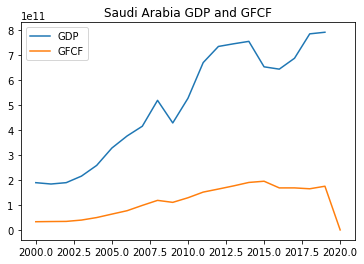

In [42]:
country = 'Saudi Arabia'
plt.title(country + " GDP and GFCF")

GDP, = plt.plot(data['Year'], data[country+ ' GDP'])
GFCF, = plt.plot(data['Year'], data[country+ ' GFCF'])

plt.legend(['GDP', 'GFCF'])

plt.show()

# normalizing and taking first difference to remove trend (Stationary)

In [43]:
newData = pd.DataFrame()

In [44]:
newData['Year'] = data['Year']
newData[country+ ' GDP'] = data[country+ ' GDP']
newData[country+ ' GFCF'] = data[country+ ' GFCF']

In [45]:
avgs = newData.mean()
devs = newData.std()

In [46]:
for col in newData.columns:
    newData[col] = (newData[col] - avgs.loc[col])/ devs.loc[col]

after normalizing

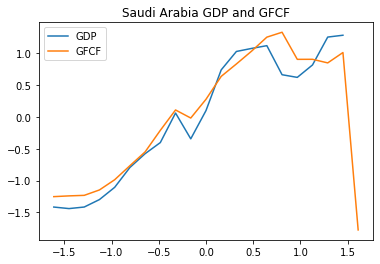

In [47]:

plt.title(country + " GDP and GFCF")

GDP, = plt.plot(newData['Year'], newData[country+ ' GDP'])
GFCF, = plt.plot(newData['Year'], newData[country+ ' GFCF'])

plt.legend(['GDP', 'GFCF'])

plt.show()

taking first difference to remove trend

In [48]:
newData[country+ ' GDP diff'] = newData[country+ ' GDP'].diff()
newData[country+ ' GFCF diff'] = newData[country+ ' GFCF'].diff()

In [49]:
newData.head()

,Year,Saudi Arabia GDP,Saudi Arabia GFCF,Saudi Arabia GDP diff,Saudi Arabia GFCF diff
0,-1.611646,-1.415044,-1.251285,NaN,NaN
1,-1.450481,-1.439111,-1.239470,-0.024067,0.011816
2,-1.289317,-1.414637,-1.231125,0.024474,0.008345
3,-1.128152,-1.297370,-1.146090,0.117267,0.085035
4,-0.966988,-1.105213,-0.985683,0.192156,0.160407


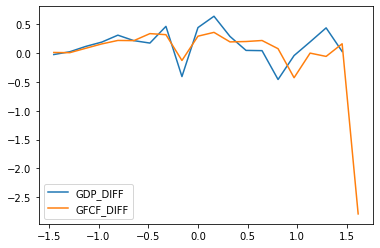

In [50]:
GDP_DIFF, = plt.plot(newData['Year'], newData[country+ ' GDP diff'])
GFCF_DIFF, = plt.plot(newData['Year'], newData[country+ ' GFCF diff'])
plt.legend(['GDP_DIFF', 'GFCF_DIFF'])
plt.show()

In [51]:
ts_df = pd.DataFrame(columns=[country+ ' GDP diff', country + ' GFCF diff' ], data= zip(newData[country+' GDP diff'], newData[country+' GFCF diff']))

In [52]:
ts_df[1:20]

,Saudi Arabia GDP diff,Saudi Arabia GFCF diff
1,-0.024067,0.011816
2,0.024474,0.008345
3,0.117267,0.085035
4,0.192156,0.160407
5,0.312025,0.220360
6,0.216798,0.217178
7,0.174835,0.338873
8,0.464707,0.320393
9,-0.405928,-0.126930
10,0.443570,0.294419


# granger test

In [53]:
gc_res = grangercausalitytests(ts_df[1:20], 5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2357  , p=0.6343  , df_denom=15, df_num=1
ssr based chi2 test:   chi2=0.2829  , p=0.5948  , df=1
likelihood ratio test: chi2=0.2807  , p=0.5962  , df=1
parameter F test:         F=0.2357  , p=0.6343  , df_denom=15, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.2643  , p=0.3175  , df_denom=12, df_num=2
ssr based chi2 test:   chi2=3.5821  , p=0.1668  , df=2
likelihood ratio test: chi2=3.2506  , p=0.1969  , df=2
parameter F test:         F=1.2643  , p=0.3175  , df_denom=12, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8457  , p=0.5028  , df_denom=9, df_num=3
ssr based chi2 test:   chi2=4.5104  , p=0.2114  , df=3
likelihood ratio test: chi2=3.9735  , p=0.2643  , df=3
parameter F test:         F=0.8457  , p=0.5028  , df_denom=9, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.5623  , p=0.6996  , df_den

In [54]:
ts_df1 = pd.DataFrame(columns=[country+ ' GFCF diff', country + ' GDP diff' ], data= zip(newData[country+' GFCF diff'], newData[country+' GDP diff']))

In [55]:
ts_df1[1:20]

,Saudi Arabia GFCF diff,Saudi Arabia GDP diff
1,0.011816,-0.024067
2,0.008345,0.024474
3,0.085035,0.117267
4,0.160407,0.192156
5,0.220360,0.312025
6,0.217178,0.216798
7,0.338873,0.174835
8,0.320393,0.464707
9,-0.126930,-0.405928
10,0.294419,0.443570


# granger test

In [56]:
gc_res = grangercausalitytests(ts_df1[1:20], 5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.4752  , p=0.2433  , df_denom=15, df_num=1
ssr based chi2 test:   chi2=1.7702  , p=0.1834  , df=1
likelihood ratio test: chi2=1.6885  , p=0.1938  , df=1
parameter F test:         F=1.4752  , p=0.2433  , df_denom=15, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8961  , p=0.4338  , df_denom=12, df_num=2
ssr based chi2 test:   chi2=2.5388  , p=0.2810  , df=2
likelihood ratio test: chi2=2.3662  , p=0.3063  , df=2
parameter F test:         F=0.8961  , p=0.4338  , df_denom=12, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.5932  , p=0.2583  , df_denom=9, df_num=3
ssr based chi2 test:   chi2=8.4971  , p=0.0368  , df=3
likelihood ratio test: chi2=6.8154  , p=0.0780  , df=3
parameter F test:         F=1.5932  , p=0.2583  , df_denom=9, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.8547  , p=0.5400  , df_den